In [1]:
import gym
import numpy as np
import random as pr
import matplotlib.pyplot as plt
from gym.envs.registration import register

[2017-06-06 22:33:38,245] Making new env: Frozenlake-v3


Success rate: 0.921
Final Q-Table Values
[[ 0.       0.       0.59049  0.     ]
 [ 0.       0.       0.6561   0.     ]
 [ 0.       0.729    0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.81     0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.9      0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.9      0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       0.     ]]


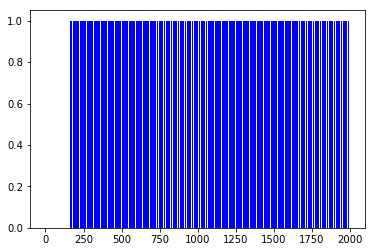

In [2]:
def rargmax(vector):
    """ Argmax that choose randomly eligible maximu indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


register(
        id='Frozenlake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4',
            'is_slippery':False
            }
        )

env = gym.make('Frozenlake-v3')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n]) # 4*4 tables and 4 action 16*4 for frozen lake
num_episodes = 2000
dis = .9 #decay rate
# create list to contain total rewards and steps per episodes
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    while not done:
        action = np.argmax(Q[state, :]+np.random.rand(1,env.action_space.n)/(i+1)) #add random noise

        # Get new state and reward from env
        new_state, reward, done, _ = env.step(action)

        # Update Q-table with new knowldege using learning rate
        Q[state,action] = reward + dis * np.max(Q[new_state,:]) # Update Q with Decay rate
        rAll += reward
        state = new_state
    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()